In [1]:
#!pip3 install ktrain
#!pip3 install tensorflow
#!pip3 install spacy==2.3.7
#!pip3 install wordcloud
#!pip3 install seaborn

In [2]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
Directory = [['Business', '/mnt/c/Users/sat/Desktop/NLP_Text_Analysis/bbc/business'],['Entertainment','/mnt/c/Users/sat/Desktop/NLP_Text_Analysis/bbc/entertainment'],['Politics','/mnt/c/Users/sat/Desktop/NLP_Text_Analysis/bbc/politics'],['Sports','/mnt/c/Users/sat/Desktop/NLP_Text_Analysis/bbc/sport'],['Tech','/mnt/c/Users/sat/Desktop/NLP_Text_Analysis/bbc/tech']]
Directory_Data = pd.DataFrame(Directory, columns=['Label', 'Path'])

In [4]:
Training_Data = pd.DataFrame( columns= ['First_Line','Text_Content', 'Label', 'File_Path', 'File_Name'] )  

for path in Directory_Data.Path.values:
    Directory = Directory_Data[Directory_Data['Path'] == path]['Label'].iloc[0]
    
    # iterate over files in a business directory
    for filename in os.listdir(path):
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            open_file = open(f,'r',encoding='unicode_escape')
            first_line = open_file.readline()        
            read_content = open_file.read()        
            Training_Data = Training_Data.append({'Text_Content': first_line + ' ' + read_content, 'Label': Directory, 'File_Path': f, 'File_Name': filename, 'First_Line': first_line}, ignore_index= True)       

<AxesSubplot:xlabel='Label', ylabel='#Text Files'>

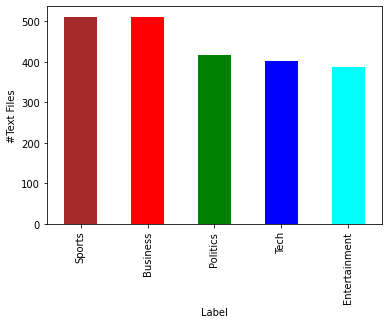

In [5]:
Training_Data.reset_index(drop=True, inplace=True)
Training_Data['Label'].value_counts().plot.bar(color=['brown', 'red', 'green', 'blue', 'cyan'], xlabel=('Label'), ylabel='#Text Files')

## Feature Extraction

In [6]:
Training_Data['Label_Id'] = Training_Data['Label'].factorize()[0]

Training_Data['Words'] = [len(x.split()) for x in Training_Data['Text_Content'].tolist()] 

Training_Data['Char']= Training_Data['Text_Content'].str.len()

In [7]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

Training_Data['Avg_Word'] = Training_Data['Text_Content'].apply(lambda x: avg_word(x))

In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

Training_Data['Stop_Words'] = Training_Data['Text_Content'].apply(lambda x: len([x for x in x.split() if x in STOP_WORDS]))

Training_Data['Special_Char'] = Training_Data['Text_Content'].str.count('[!@#$%^&*(),.?":{}|<>]')

Training_Data['Upper_Case'] = Training_Data['Text_Content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

#Training_Data.drop('Digit_Count', axis=1, inplace=True)
Training_Data.loc[:, Training_Data.columns != 'File_Path'].head()


,First_Line,Text_Content,Label,File_Name,Label_Id,Words,Char,Avg_Word,Stop_Words,Special_Char,Upper_Case
0,Ad sales boost Time Warner profit\n,Ad sales boost Time Warner profit\n \nQuarterl...,Business,001.txt,0,421,2561,5.068884,163,71,10
1,Dollar gains on Greenspan speech\n,Dollar gains on Greenspan speech\n \nThe dolla...,Business,002.txt,0,384,2253,4.856771,153,41,10
2,Yukos unit buyer faces loan claim\n,Yukos unit buyer faces loan claim\n \nThe owne...,Business,003.txt,0,264,1553,4.867424,106,29,2
3,High fuel prices hit BA's profits\n,High fuel prices hit BA's profits\n \nBritish ...,Business,004.txt,0,406,2413,4.928571,145,68,11
4,Pernod takeover talk lifts Domecq\n,Pernod takeover talk lifts Domecq\n \nShares i...,Business,005.txt,0,265,1571,4.913208,100,40,5


## Text Pre-processing

In [9]:
# Remove Special characters and digits. Make all character lowercase 
Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace('[!@#$%^&*(),.?":{}|<>]',' ').map(lambda x:str(x).lower().strip()).map(lambda x: re.sub(r'[^a-z ]','',x))
Training_Data['First_Line'] = Training_Data['First_Line'].str[:-1]

# Delete everything between the brackets
Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace(r"\(.*\)","")

# Remove Stopwords 
Training_Data['Text_Content'] = Training_Data['Text_Content'].apply(lambda x: " ".join(x for x in x.split() if x not in STOP_WORDS))

# Training_Data.drop('words', axis=1, inplace=True)

/tmp/ipykernel_191/4069968045.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace('[!@#$%^&*(),.?":{}|<>]',' ').map(lambda x:str(x).lower().strip()).map(lambda x: re.sub(r'[^a-z ]','',x))
/tmp/ipykernel_191/4069968045.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace(r"\(.*\)","")


In [10]:
#pd.Series(' '.join(Training_Data[Training_Data['Label'] == 'Business']['Text_Content']).split()).value_counts()[:10]
#pd.Series(' '.join(Training_Data[Training_Data['Label'] == 'Entertainment']['Text_Content']).split()).value_counts()[:10]
#pd.Series(' '.join(Training_Data[Training_Data['Label'] == 'Politics']['Text_Content']).split()).value_counts()[:10]
#pd.Series(' '.join(Training_Data[Training_Data['Label'] == 'Sports']['Text_Content']).split()).value_counts()[:10]
#pd.Series(' '.join(Training_Data[Training_Data['Label'] == 'Tech']['Text_Content']).split()).value_counts()[:10]

Common_Word = pd.Series(' '.join(Training_Data['Text_Content']).split()).value_counts()[:7]
Common_Word = list(Common_Word.index)

# Removing common words
Training_Data['Text_Content'] = Training_Data['Text_Content'].apply(lambda x: " ".join(x for x in x.split() if x not in Common_Word))

In [11]:
# Data validation
Training_Data[Training_Data['Text_Content'].isnull()]
Training_Data['Words'].max()
Training_Data['Words'].min()
len(Training_Data)

2225

In [12]:
Label_Id_Data = Training_Data[['Label', 'Label_Id']].drop_duplicates().sort_values('Label_Id')
Label_Id_Data.reset_index(drop=True, inplace=True)

## Text Representation

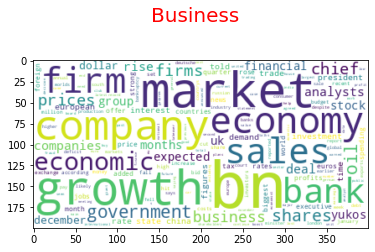

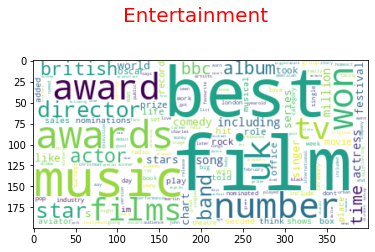

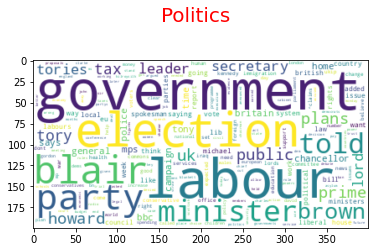

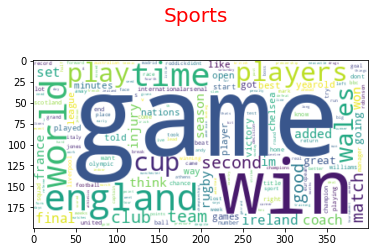

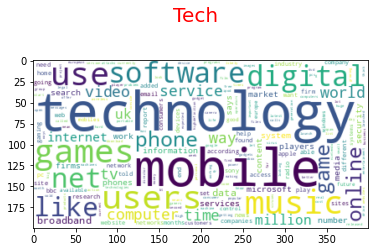

In [13]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for Id in Label_Id_Data.Label_Id.values:
    df = Training_Data[Training_Data['Label_Id']  == Id]
    label = Label_Id_Data[Label_Id_Data['Label_Id'] == Id]['Label'].iloc[0]

    # Add words to an array
    words = ''
    for i in df.Text_Content.values:
        words += ' '+ i
    
    # Create a pandas dataframe with the word and its frequency
    wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

    # Convert the dataframe to a dictionary
    data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

    wc = WordCloud(background_color='white',
                   stopwords=STOPWORDS,
                   max_words=200).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.suptitle(label, fontsize=20, color = 'red')
    plt.show()


In [14]:
Label_to_Id = dict(Label_Id_Data.values)
Id_to_Label = dict(Label_Id_Data[['Label_Id', 'Label']].values)
Label_to_Id

{'Business': 0, 'Entertainment': 1, 'Politics': 2, 'Sports': 3, 'Tech': 4}

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf_Idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3))

# Map each words in all the text files in the Text_Content column of Training_Data into Features (Superset of words)
# Features are assigned based on each words frequency in the text files and across the text files
Features = Tf_Idf.fit_transform(Training_Data.Text_Content).toarray() 

Labels = Training_Data.Label_Id    
Features.shape # No. of Features

(2225, 13579)

In [16]:
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each label, find words that are highly corelated to it
for Label, Label_Id in sorted(Label_to_Id.items()):
  Features_chi2 = chi2(Features, Labels == Label_Id)                   # Do chi2 analyses of all items in this category
  Indices = np.argsort(Features_chi2[0])                               # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  Feature_Names = np.array(Tf_Idf.get_feature_names())[Indices]        # Converts indices to feature names ( in increasing order of chi-squared stat values)
  Unigrams = [v for v in Feature_Names if len(v.split(' ')) == 1]      # List of single word features ( in increasing order of chi-squared stat values)
  Bigrams = [v for v in Feature_Names if len(v.split(' ')) == 2]       # List for two-word features ( in increasing order of chi-squared stat values)
  Trigrams = [v for v in Feature_Names if len(v.split(' ')) == 3]      # List for three-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Label))
  print("  . Most correlated Unigrams:\n       . {}".format('\n       . '.join(Unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated Bigrams:\n       . {}".format('\n       . '.join(Bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  print("  . Most correlated Trigrams:\n       . {}".format('\n       . '.join(Trigrams[-N:]))) # Print 3 Trigrams with highest Chi squared stat

# 'Business':
  . Most correlated Unigrams:
       . growth
       . shares
       . bn
  . Most correlated Bigrams:
       . stock market
       . economic growth
       . bn bn
  . Most correlated Trigrams:
       . london stock exchange
       . bn euros bn
       . securities exchange commission
# 'Entertainment':
  . Most correlated Unigrams:
       . awards
       . actor
       . film
  . Most correlated Bigrams:
       . los angeles
       . film festival
       . box office
  . Most correlated Trigrams:
       . robert de niro
       . berlin film festival
       . million dollar baby
# 'Politics':
  . Most correlated Unigrams:
       . blair
       . election
       . labour
  . Most correlated Bigrams:
       . prime minister
       . general election
       . tony blair
  . Most correlated Trigrams:
       . bbc radio today
       . tory leader michael
       . leader michael howard
# 'Sports':
  . Most correlated Unigrams:
       . match
       . coach
       . cup
  . Mos

In [17]:
Features_chi2

(array([0.03377931, 0.07769171, 0.01063909, ..., 0.03323065, 0.11148856,
        0.18526557]),
 array([0.85417705, 0.78045025, 0.91784713, ..., 0.85535298, 0.73845576,
        0.66688661]))

## Model Selection

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0),
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(random_state=0)
]

In [19]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [20]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, Features, Labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

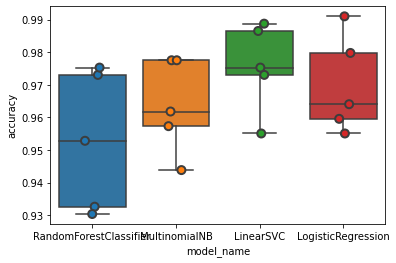

In [21]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.975730
LogisticRegression        0.969888
MultinomialNB             0.963596
RandomForestClassifier    0.952809
Name: accuracy, dtype: float64

## Model Evaluation

In [23]:
from sklearn.model_selection import train_test_split

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(Features, Labels, Training_Data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

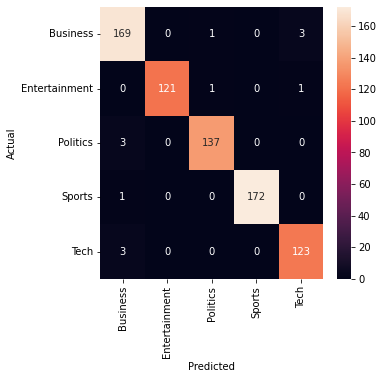

In [24]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=Label_Id_Data.Label.values, yticklabels=Label_Id_Data.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()